# NijiEN Fanbase Overlap

Data science project by Gloria Kao, aka @kiwiww76 on Twitter

# Introduction

Nijisanji is a famous VTuber agency company based in Japan, with an increasingly popular overseas branch known as Nijisanji EN, which is the focus of this project. The **goal of this project** is to see **which Nijisanji EN livers are most likely to have overlapping fanbases/fandoms.**


# Data Collection

Data was collected anonymously via a Google Forms survey that was posted on Twitter and Discord. A total of 586 people responded. 

Link: https://docs.google.com/forms/d/1gMNT0HyneWkzDIBwqEfKzx28BDqZXWnKGWroTk0r-6Y/edit

Five questions were asked:
1. `Who is our oshi(s)?` - checkboxes question (select multiple)
2. `Gender` - multiple choice question
3. `Age` - integer entered by the respondant
4. `Time zone` (in UTC) - multiple choice question
5. `Are you native/fluent in English?` - Yes/No question


# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('data/Nijisanji EN Fanbase Overlap Survey.csv')
data

,Timestamp,Who is your oshi(s)?,Gender,Age,Time zone,Are you native/fluent in English?
0,2023/05/21 12:52:12 AM MDT,Vox Akuma;Uki Violeta;Fulgur Ovid,NaN,NaN,UTC -5,Yes
1,2023/05/21 12:55:26 AM MDT,Luca Kaneshiro;Shu Yamino;Ike Eveland;Mysta Ri...,NaN,20.0,UTC +8,Yes
2,2023/05/21 12:57:57 AM MDT,Elira Pendora;Selen Tatsuki;Millie Parfait;Luc...,NaN,NaN,UTC +14/-10,Yes
3,2023/05/21 12:58:43 AM MDT,Uki Violeta;Fulgur Ovid,NaN,23.0,UTC -7,Yes
4,2023/05/21 1:00:21 AM MDT,Fulgur Ovid,NaN,34.0,UTC +7,No
...,...,...,...,...,...,...
581,2023/06/15 11:51:27 PM MDT,Selen Tatsuki;Sonny Brisko;Kotoka Torahime,Non-binary,26.0,UTC +8,Yes
582,2023/06/15 11:54:59 PM MDT,Elira Pendora;Finana Ryugu;Rosemi Lovelock;Sel...,Non-binary,20.0,UTC -7,Yes
583,2023/06/16 11:07:13 AM MDT,Luca Kaneshiro;Shu Yamino;Mysta Rias;Sonny Bri...,Female,18.0,UTC +8,Yes
584,2023/06/18 10:36:18 PM MDT,Shu Yamino;Sonny Brisko;Alban Knox;Ren Zotto;D...,Female,25.0,UTC +7,No


In [3]:
data.dtypes

Timestamp                             object
Who is your oshi(s)?                  object
Gender                                object
Age                                  float64
Time zone                             object
Are you native/fluent in English?     object
dtype: object

In [4]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

C:\Users\glori\AppData\Roaming\Python\Python311\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname MDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\glori\AppData\Local\Temp\ipykernel_17424\652119658.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Timestamp'] = pd.to_datetime(data['Timestamp'])


In [5]:
# timestamp is like the ID, every one is unique
data['Timestamp'].unique()

<DatetimeArray>
['2023-05-21 00:52:12', '2023-05-21 00:55:26', '2023-05-21 00:57:57',
 '2023-05-21 00:58:43', '2023-05-21 01:00:21', '2023-05-21 01:01:19',
 '2023-05-21 01:07:59', '2023-05-21 01:09:49', '2023-05-21 01:10:25',
 '2023-05-21 01:14:09',
 ...
 '2023-06-14 05:26:21', '2023-06-14 11:36:41', '2023-06-14 13:13:06',
 '2023-06-14 17:33:42', '2023-06-14 18:24:57', '2023-06-15 23:51:27',
 '2023-06-15 23:54:59', '2023-06-16 11:07:13', '2023-06-18 22:36:18',
 '2023-06-19 11:01:01']
Length: 586, dtype: datetime64[ns]

### Cleaning the "oshis" column

Each liver has their own column. Each row represents a respondant, and if they oshi a liver, then `True` for that colum, else `False`.

In [6]:
oshis_list = data['Who is your oshi(s)?'].str.split(';')
oshis_count = []
for l in oshis_list:
    oshis_count.append(len(l))
data['number of oshis'] = oshis_count
data

,Timestamp,Who is your oshi(s)?,Gender,Age,Time zone,Are you native/fluent in English?,number of oshis
0,2023-05-21 00:52:12,Vox Akuma;Uki Violeta;Fulgur Ovid,NaN,NaN,UTC -5,Yes,3
1,2023-05-21 00:55:26,Luca Kaneshiro;Shu Yamino;Ike Eveland;Mysta Ri...,NaN,20.0,UTC +8,Yes,5
2,2023-05-21 00:57:57,Elira Pendora;Selen Tatsuki;Millie Parfait;Luc...,NaN,NaN,UTC +14/-10,Yes,8
3,2023-05-21 00:58:43,Uki Violeta;Fulgur Ovid,NaN,23.0,UTC -7,Yes,2
4,2023-05-21 01:00:21,Fulgur Ovid,NaN,34.0,UTC +7,No,1
...,...,...,...,...,...,...,...
581,2023-06-15 23:51:27,Selen Tatsuki;Sonny Brisko;Kotoka Torahime,Non-binary,26.0,UTC +8,Yes,3
582,2023-06-15 23:54:59,Elira Pendora;Finana Ryugu;Rosemi Lovelock;Sel...,Non-binary,20.0,UTC -7,Yes,18
583,2023-06-16 11:07:13,Luca Kaneshiro;Shu Yamino;Mysta Rias;Sonny Bri...,Female,18.0,UTC +8,Yes,7
584,2023-06-18 22:36:18,Shu Yamino;Sonny Brisko;Alban Knox;Ren Zotto;D...,Female,25.0,UTC +7,No,5


In [7]:
livers = [
    'Pomu Rainpuff',
    'Elira Pendora', 
    'Finana Ryugu',
    'Rosemi Lovelock',
    'Petra Gurin',
    'Selen Tatsuki',
    'Nina Kosaka',
    'Millie Parfait',
    'Enna Alouette',
    'Reimu Endou',
    'Luca Kaneshiro',
    'Shu Yamino',
    'Ike Eveland',
    'Mysta Rias',
    'Vox Akuma',
    'Sonny Brisko',
    'Uki Violeta',
    'Alban Knox',
    'Fulgur Ovid',
    'Maria Marionette',
    'Kyo Kaneko',
    'Aia Amare',
    'Aster Arcadia',
    'Scarle Yonaguni',
    'Ren Zotto',
    'Doppio Dropscythe',
    'Meloco Kyoran',
    'Hex Haywire',
    'Kotoka Torahime',
    'Ver Vermillion'
]

In [8]:
# each row represents one fan and their oshis
oshis = data['Who is your oshi(s)?']
counts_dict = {}
for liver in livers:
    counts_dict[liver] = oshis.str.contains(liver)
    
oshis_df = pd.DataFrame(counts_dict)
oshis_df

,Pomu Rainpuff,Elira Pendora,Finana Ryugu,Rosemi Lovelock,Petra Gurin,Selen Tatsuki,Nina Kosaka,Millie Parfait,Enna Alouette,Reimu Endou,...,Kyo Kaneko,Aia Amare,Aster Arcadia,Scarle Yonaguni,Ren Zotto,Doppio Dropscythe,Meloco Kyoran,Hex Haywire,Kotoka Torahime,Ver Vermillion
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
582,False,True,True,True,False,True,False,False,True,True,...,False,True,True,False,True,True,True,True,False,True
583,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
584,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False


In [9]:
# merging the two df 
data = data.merge(oshis_df, left_index=True, right_index=True)
data = data.drop('Who is your oshi(s)?', axis=1)
data

,Timestamp,Gender,Age,Time zone,Are you native/fluent in English?,number of oshis,Pomu Rainpuff,Elira Pendora,Finana Ryugu,Rosemi Lovelock,...,Kyo Kaneko,Aia Amare,Aster Arcadia,Scarle Yonaguni,Ren Zotto,Doppio Dropscythe,Meloco Kyoran,Hex Haywire,Kotoka Torahime,Ver Vermillion
0,2023-05-21 00:52:12,NaN,NaN,UTC -5,Yes,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2023-05-21 00:55:26,NaN,20.0,UTC +8,Yes,5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2023-05-21 00:57:57,NaN,NaN,UTC +14/-10,Yes,8,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
3,2023-05-21 00:58:43,NaN,23.0,UTC -7,Yes,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2023-05-21 01:00:21,NaN,34.0,UTC +7,No,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,2023-06-15 23:51:27,Non-binary,26.0,UTC +8,Yes,3,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
582,2023-06-15 23:54:59,Non-binary,20.0,UTC -7,Yes,18,False,True,True,True,...,False,True,True,False,True,True,True,True,False,True
583,2023-06-16 11:07:13,Female,18.0,UTC +8,Yes,7,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
584,2023-06-18 22:36:18,Female,25.0,UTC +7,No,5,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False


### Cleaning the "gender" column

Question number 2 (gender) was added later after some people had already filled out the survey, so there are a lot of missing values. We will not imputate (replace) the missing values because that would be making up false data.

In [10]:
data['Gender'].value_counts()

Gender
Female                      97
Non-binary                  27
Male                        15
I dont even know anymore     1
Bigender                     1
Genderfluid                  1
bigender                     1
Prefer not to answer         1
Demigirl                     1
Name: count, dtype: int64

In [11]:
# the 3 main genders are: female, non-binary, and male
# replace the other responses with "other"
# leave NaN as is

def standardize_gender(string):
    if type(string) == float:
        output = np.NAN
    elif string not in {'Female', 'Non-binary', 'Male'}:
        output = 'Other'
    else:
        output = string
    return output

data['Gender'] = data['Gender'].apply(standardize_gender)
data

,Timestamp,Gender,Age,Time zone,Are you native/fluent in English?,number of oshis,Pomu Rainpuff,Elira Pendora,Finana Ryugu,Rosemi Lovelock,...,Kyo Kaneko,Aia Amare,Aster Arcadia,Scarle Yonaguni,Ren Zotto,Doppio Dropscythe,Meloco Kyoran,Hex Haywire,Kotoka Torahime,Ver Vermillion
0,2023-05-21 00:52:12,NaN,NaN,UTC -5,Yes,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2023-05-21 00:55:26,NaN,20.0,UTC +8,Yes,5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2023-05-21 00:57:57,NaN,NaN,UTC +14/-10,Yes,8,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
3,2023-05-21 00:58:43,NaN,23.0,UTC -7,Yes,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2023-05-21 01:00:21,NaN,34.0,UTC +7,No,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,2023-06-15 23:51:27,Non-binary,26.0,UTC +8,Yes,3,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
582,2023-06-15 23:54:59,Non-binary,20.0,UTC -7,Yes,18,False,True,True,True,...,False,True,True,False,True,True,True,True,False,True
583,2023-06-16 11:07:13,Female,18.0,UTC +8,Yes,7,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
584,2023-06-18 22:36:18,Female,25.0,UTC +7,No,5,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False


In [12]:
data['Gender'].value_counts()

Gender
Female        97
Non-binary    27
Male          15
Other          6
Name: count, dtype: int64

### Cleaning the "age" column

On the Google Forms, a person could only answer in intergers from 1-100, so there is minimal cleaning needed. 

In [19]:
# the number of nulls
data['Age'].isna().sum()

51

<Axes: xlabel='Age', ylabel='Count'>

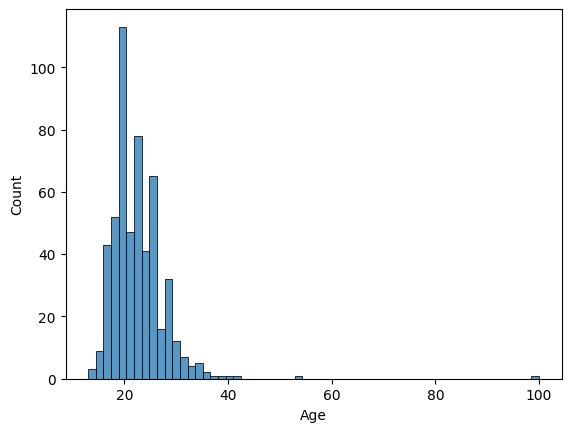

In [13]:
sns.histplot(data, x='Age')

In [14]:
# the possible maximum that a respondent could enter is 100, so this seems like a troll answer
# 100 is an outlier, but not an impossible answer either, so it will be kept
data['Age'].max()

100.0